# Segmentación de Clientes para DesignReels

En el competitivo mundo del comercio electrónico, entender a fondo a nuestros clientes es fundamental para ofrecer experiencias personalizadas y maximizar la satisfacción y lealtad del cliente. Este análisis de segmentación de clientes tiene como objetivo explorar y comprender las distintas características y comportamientos de los clientes que interactúan con nuestra tienda en línea, especializada en productos creativos.

Utilizando técnicas avanzadas de análisis de datos, como clustering y segmentación, este estudio buscará identificar grupos homogéneos de clientes. Estos segmentos nos permitirán personalizar estrategias de marketing más efectivas, optimizar la selección de productos y mejorar la experiencia general de compra. Al comprender las necesidades y preferencias únicas de cada segmento, aspiramos a fortalecer la conexión emocional con la marca y aumentar la retención de clientes a largo plazo.

A lo largo de este análisis, exploraremos cómo diferentes segmentos de clientes interactúan con nuestros productos, qué atributos compartidos tienen y cómo podemos adaptar nuestras iniciativas de negocio para satisfacer mejor sus expectativas. Este enfoque estratégico no solo impulsará el crecimiento y la rentabilidad de DesignReels, sino que también nos permitirá destacar en un mercado saturado al ofrecer soluciones que verdaderamente resuenen con nuestros clientes.

Juntos, avanzaremos hacia una comprensión más profunda de nuestros clientes y hacia la creación de experiencias de compra personalizadas y significativas que fortalezcan la posición de DesignReels como líder en su categoría de productos creativos.


# Diccionario de datos 

El conjunto de datos contiene información detallada sobre las transacciones de ventas de la tienda 

Descripción de las Columnas

- invoice_no: Número de factura generado para cada transacción.
- stock_code: Código único que identifica cada producto vendido.
- description: Descripción del producto vendido.
- quantity: Cantidad de unidades vendidas de cada producto en la factura.
- invoice_date: Fecha y hora en que se emitió la factura.
- unit_price: Precio unitario del producto en la factura.
- customer_id: Identificación única del cliente que realizó la compra.
- region: Región o ubicación del cliente.
- total: Total de la venta, calculado como la cantidad vendida multiplicada por el precio unitario.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [5]:
df = pd.read_csv(r'datasets\Online_Retail.csv', encoding='iso-8859-1')

In [6]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
279134,C561240,84949,SILVER HANGING T-LIGHT HOLDER,-1,26/07/2020 10:33,1.65,17677.0,United Kingdom
173078,551650,21114,LAVENDER SCENTED FABRIC HEART,10,03/05/2020 12:02,1.25,13089.0,United Kingdom
91644,544111,22968,ROSE COTTAGE KEEPSAKE BOX,8,16/02/2020 11:18,8.50,16126.0,United Kingdom
385749,570214,17003,BROCADE RING PURSE,36,09/10/2020 11:50,0.39,12748.0,United Kingdom
380273,569741,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,06/10/2020 10:52,4.25,14626.0,United Kingdom
90800,544070,48185,DOORMAT FAIRY CAKE,10,15/02/2020 14:19,6.75,15370.0,United Kingdom
517317,580050,22619,SET OF 6 SOLDIER SKITTLES,1,01/12/2020 12:54,3.75,14960.0,United Kingdom
116544,546252,22740,POLKADOT PEN,48,10/03/2020 14:42,0.85,14930.0,Channel Islands
482210,577429,20973,12 PENCIL SMALL TUBE WOODLAND,24,20/11/2020 11:06,0.65,14881.0,United Kingdom
263182,559942,23173,REGENCY TEAPOT ROSES,66,14/07/2020 10:21,8.15,17396.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#cambio del nombre de las columnas a minusculas
new_col_name = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_name.append(name_no_spaces)

df.columns = new_col_name


In [9]:
#cambio de tipo de la columna invoce_date a datetime
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")

In [10]:
#se llenan los nan de la columna customer_id con 0
df['customer_id'] = df['customer_id'].fillna(0)

In [11]:
#cambio del tipo de la columna customer_id a entero
df['customer_id'] = df['customer_id'].astype(int)

In [12]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
415315,572533,84877D,NaN,-1,2020-10-24 16:06:00,0.00,0,United Kingdom
360055,568209,84949,SILVER HANGING T-LIGHT HOLDER,72,2020-09-25 15:43:00,1.45,13089,United Kingdom
18630,537823,21328,BALLOONS WRITING SET,1,2019-12-08 14:25:00,3.36,0,United Kingdom
538079,581395,21755,LOVE BUILDING BLOCK WORD,1,2020-12-08 13:18:00,6.25,16892,United Kingdom
26341,538508,22801,ANTIQUE GLASS PEDESTAL BOWL,2,2019-12-12 13:32:00,3.75,15998,United Kingdom
54815,540977,35957,SMALLFOLKART BAUBLE CHRISTMAS DEC,3,2020-01-12 15:01:00,1.66,0,United Kingdom
287703,562113,21121,SET/10 RED POLKADOT PARTY CANDLES,2,2020-08-02 16:11:00,2.46,0,United Kingdom
181196,552453,20711,JUMBO BAG TOYS,10,2020-05-09 14:10:00,2.08,12840,United Kingdom
435267,574074,23004,TRAVEL CARD WALLET PANTRY,1,2020-11-02 15:33:00,0.83,0,United Kingdom
243257,558441,84988,SET OF 72 PINK HEART PAPER DOILIES,1,2020-06-29 12:59:00,1.45,14606,United Kingdom


In [13]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [14]:
#se remplaza el nombre de los paises agregaqdos como EIRE y RSA para unificar todos los nombres en ingles y mayusculas y minusculas 
df['region']= df['region'].replace('EIRE', 'Ireland')

In [15]:
df['region']= df['region'].replace('RSA', 'Sudafrica')

In [16]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [17]:
#verificacion de los valores menores a cero en la columan quantity. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [18]:
#verificacion de los valores menores a cero en la columan unit_price. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,0,United Kingdom


In [19]:
#creacion de una nueva columana que calcula el total vendido por factura 
df['total'] = df['quantity'] * df['unit_price']

In [20]:
#se convierten las descripciones a minuscula para unificar el formato 
df['description'] = df['description'].str.lower()

In [21]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
36789,539453,22224,white lovebird lantern,2,2019-12-17 17:08:00,5.91,0,United Kingdom,11.82
453681,575491,22470,heart of wicker large,3,2020-11-09 17:47:00,2.95,15531,United Kingdom,8.85
535720,581217,22814,card party games,9,2020-12-08 09:20:00,0.42,0,United Kingdom,3.78
118500,546435,47599B,blue party bags,6,2020-03-14 09:37:00,2.10,15671,United Kingdom,12.60
361422,568346,22619,set of 6 soldier skittles,8,2020-09-26 15:28:00,7.46,14096,United Kingdom,59.68
281069,561513,22099,caravan square tissue box,2,2020-07-27 15:12:00,2.46,0,United Kingdom,4.92
335109,566277,85231G,orange scented set/9 t-lights,12,2020-09-11 14:01:00,0.85,16796,United Kingdom,10.20
398660,571257,23526,wall art dog licence,2,2020-10-14 17:17:00,12.46,0,United Kingdom,24.92
224307,556515,22166,wall mirror rectangle diamante pink,1,2020-06-13 10:45:00,15.79,0,United Kingdom,15.79
227038,556815,21936,red retrospot picnic bag,5,2020-06-15 08:36:00,2.95,14852,United Kingdom,14.75


In [22]:
#verificar que no existe ningun valor 0 en la columna quantity; sin embargo tener en cuenta que si existen aun menores a 0 
df[df['quantity'] == 0]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [23]:
#se decide eliminar del dataframe los datos que en unit_price y en customer_id sean iguales a 0, dado que consideramos no aportan ningun informacion util para futuros analisis
ceros = df.query(('unit_price > 0 & customer_id >= 0'))
display(ceros)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


In [24]:
#verificacion relacionado con los datos eliminados 
ceros['description'].unique()

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "u" bling key ring',
       'cream hanging heart t-light holder', 'paper craft  little birdie'],
      dtype=object)

In [25]:
#verificacion relacionado con los datos eliminados 
ceros['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [26]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.year.unique()


array([2019, 2020])

In [27]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0 

df = df.query('unit_price > 0.0')

df = df.query('customer_id > 0')

df = df.query('quantity > 0')

In [29]:
#Se observan los valores maximos de la columna unit price y nos damos cuenta que hay facturas que no son productos como tal, cuyos monton son muy altos dado que el valor por unidad es elevado tambien
#al parecer estas facturas corresponden a gastos de envio y/0 gastos varios que podrian afectar nuestra analisis de clientes, dado que nos interesa unicamente sus compras se eliminan del dataset
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
117054,546328,M,manual,1,2020-03-11 10:19:00,1687.17,14911,Ireland,1687.17
117055,546329,M,manual,1,2020-03-11 10:22:00,1687.17,14911,Ireland,1687.17
144826,548813,M,manual,1,2020-04-04 13:03:00,2382.92,12744,Singapore,2382.92
144828,548813,M,manual,1,2020-04-04 13:03:00,1252.95,12744,Singapore,1252.95
144829,548820,M,manual,1,2020-04-04 13:04:00,2053.07,12744,Singapore,2053.07
145831,548913,M,manual,1,2020-04-05 09:45:00,1136.30,12669,France,1136.30
150615,549468,M,manual,1,2020-04-08 14:27:00,1867.86,17940,United Kingdom,1867.86
173382,551697,POST,postage,1,2020-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
187584,552980,POST,postage,1,2020-05-12 14:52:00,523.00,12590,Germany,523.00
188277,553018,M,manual,1,2020-05-12 19:02:00,557.72,12757,Portugal,557.72


In [30]:
df = df.query("stock_code != 'M'")
df = df.query("stock_code != 'DOT'")
df = df.query("stock_code != 'POST'")

In [31]:
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
222680,556444,22502,picnic basket wicker 60 pieces,60,2020-06-10 15:28:00,649.5,15098,United Kingdom,38970.0
222682,556446,22502,picnic basket wicker 60 pieces,1,2020-06-10 15:33:00,649.5,15098,United Kingdom,649.5


In [32]:
df[df['unit_price'] == 0.0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [33]:
df[df['quantity'] == 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [34]:
df.sample(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
259639,559698,20978,36 pencils tube skulls,4,2020-07-11 17:07:00,1.25,17589,United Kingdom,5.00
288274,562148,21198,white heart confetti in tube,12,2020-08-03 10:49:00,1.65,13695,United Kingdom,19.80
242926,558383,21916,set 12 retro white chalk sticks,24,2020-06-29 08:58:00,0.42,18075,United Kingdom,10.08
350644,567656,22141,christmas craft tree top angel,2,2020-09-21 14:40:00,4.13,14096,United Kingdom,8.26
353866,567850,23268,set of 2 ceramic christmas reindeer,12,2020-09-22 13:18:00,1.45,15067,United Kingdom,17.40
90891,544074,22773,green drawer knob acrylic edwardian,12,2020-02-15 14:49:00,1.25,14156,Ireland,15.00
182910,552624,22165,diamante heart shaped wall mirror,1,2020-05-10 12:53:00,12.75,14505,United Kingdom,12.75
147742,549129,22439,6 rocket balloons,10,2020-04-06 14:53:00,0.65,17042,United Kingdom,6.50
458442,575838,22083,paper chain kit retrospot,6,2020-11-11 11:38:00,2.95,13999,United Kingdom,17.70
45458,540260,20801,large pink glass sundae dish,16,2020-01-06 09:40:00,0.75,13097,United Kingdom,12.00


In [35]:
#se verificaron los posibles datos duplicados en todas las columanas posibles y concluimos que los duplicados existentes son coherentes. No se elimina ninguno
df['stock_code'].duplicated().sum()

392823

In [36]:
df.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,396485.000000,396485,396485.000000,396485.000000,396485.000000
mean,13.008066,2020-07-10 20:02:19.138226944,2.884385,15301.436912,22.114122
min,1.000000,2019-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2020-04-07 11:16:00,1.250000,13975.000000,4.680000
50%,6.000000,2020-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2020-10-20 14:40:00,3.750000,16801.000000,19.800000
max,80995.000000,2020-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,179.607863,NaN,4.354867,1709.758505,308.841950


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396485 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    396485 non-null  object        
 1   stock_code    396485 non-null  object        
 2   description   396485 non-null  object        
 3   quantity      396485 non-null  int64         
 4   invoice_date  396485 non-null  datetime64[ns]
 5   unit_price    396485 non-null  float64       
 6   customer_id   396485 non-null  int32         
 7   region        396485 non-null  object        
 8   total         396485 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.7+ MB


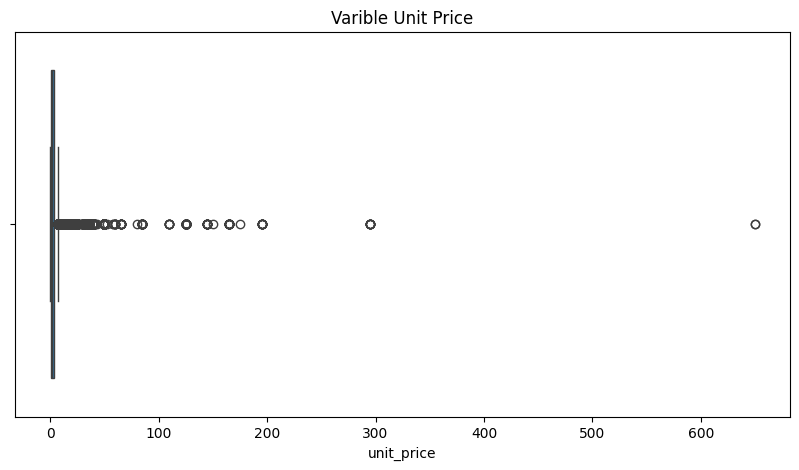

In [38]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['unit_price'])
plt.title('Varible Unit Price')
plt.show()

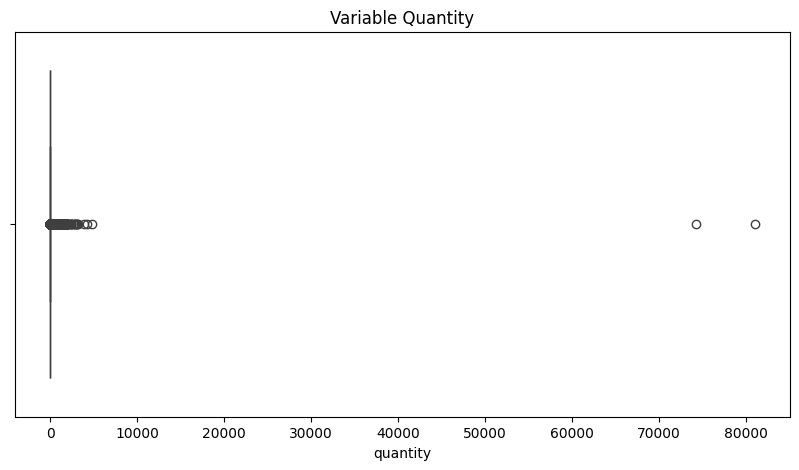

In [39]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['quantity'])
plt.title('Variable Quantity')
plt.show()

In [40]:

# Persistiendo los cambios

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
current_date = df['invoice_date'].max()

# Calcula Recencia, Frecuencia y Valor Monetario
rfm_df = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (current_date - x.max()).days,
    'total': ['sum', 'count']
})

rfm_df.columns = ['Recency', 'Monetary', 'Frequency']
rfm_df.reset_index(inplace=True)

# Asigna puntuaciones RFM
rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

# Puedes combinar las puntuaciones en un código RFM para cada cliente
rfm_df['RFM_Score'] = rfm_df['R_rank'] + rfm_df['F_rank'] + rfm_df['M_rank']

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score
0,12346,326,77183.60,1,5,1,5,11
1,12347,1,4310.00,182,1,5,5,11
2,12348,74,1437.24,27,4,2,4,10
3,12349,18,1457.55,72,2,4,4,10
4,12350,310,294.40,16,5,2,2,9


In [41]:
rfm_df['RFM_Score'].value_counts()

RFM_Score
11    688
7     651
10    642
9     618
8     538
12    363
6     320
5     176
13    156
4      94
14     47
3      35
15      7
Name: count, dtype: int64

In [42]:
def segment_customer(row):
    if row['RFM_Score'] > 12:
        return 'Alto valor'
    elif row['RFM_Score'] > 9:
        return 'Leal'
    elif row['RFM_Score'] > 6:
        return 'Potencial'
    elif row['RFM_Score'] > 3:
        return 'Activo'
    else:
        return 'Cliente Perdido' 

# Aplica la función de segmentación a cada fila del DataFrame
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment
0,12346,326,77183.60,1,5,1,5,11,Leal
1,12347,1,4310.00,182,1,5,5,11,Leal
2,12348,74,1437.24,27,4,2,4,10,Leal
3,12349,18,1457.55,72,2,4,4,10,Leal
4,12350,310,294.40,16,5,2,2,9,Potencial


In [43]:
# Conteo de clientes por segmento
print(rfm_df['Segment'].value_counts())

Segment
Potencial          1807
Leal               1693
Activo              590
Alto valor          210
Cliente Perdido      35
Name: count, dtype: int64


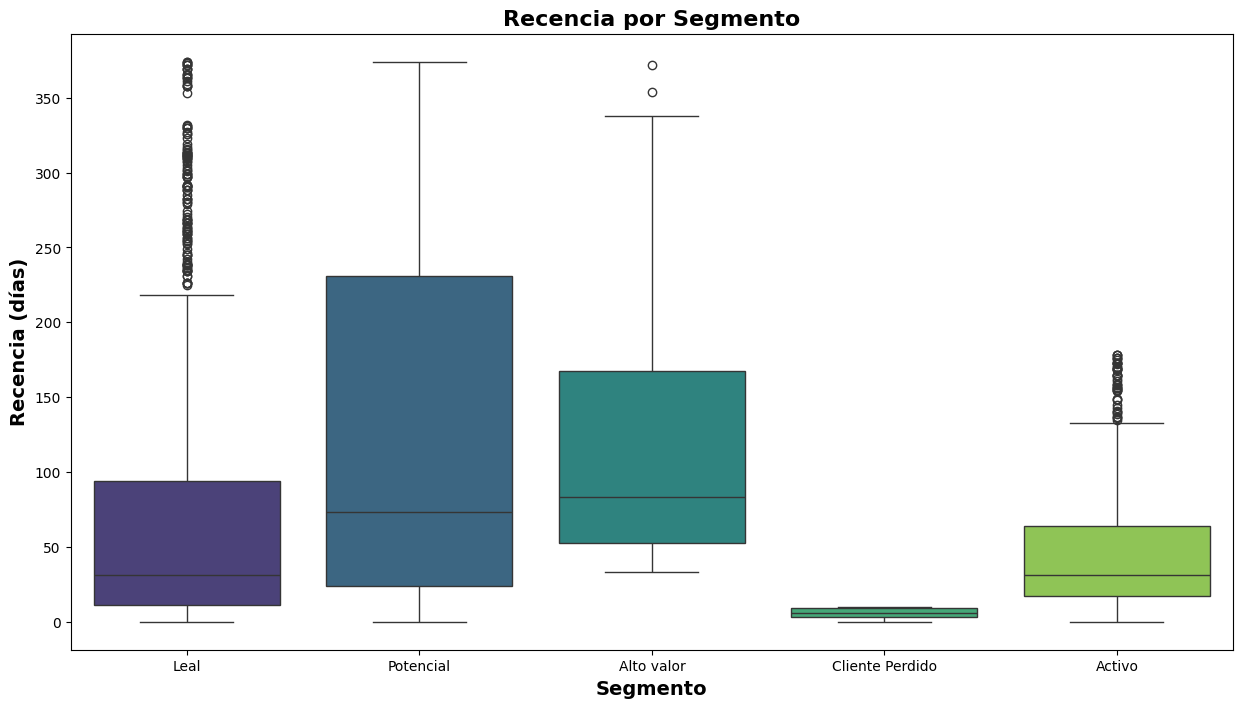

In [44]:
# Gráfico de Caja y Bigote para Recencia por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Recency', palette='viridis', hue='Segment')
plt.title('Recencia por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Recencia (días)', fontsize=14, fontweight='bold')
#plt.xticks(rotation=45)
plt.grid(False)
plt.show()

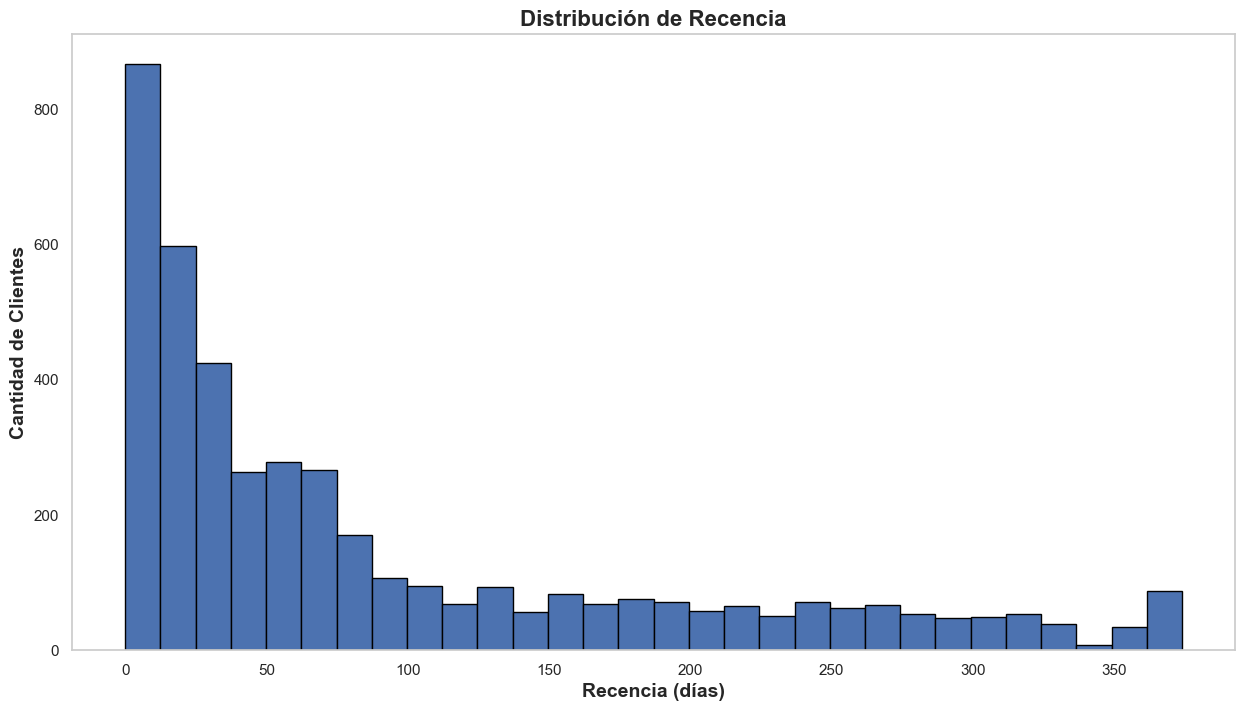

In [45]:
# Histogramas
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
rfm_df['Recency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Recencia', fontsize=16, fontweight='bold')
plt.xlabel('Recencia (días)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')
plt.show()

Se realizo un analisis para visualizar cuandos dias suelen esperar los clientes hasta su sigiente compra. Como se observa la mayoria de los clientes suelen esperar ente 50 y 70 dias entre sus compras.

Lo que observamos en esta gráfica es la distribución de clientes por su antigüedad. La mayor concentración de clientes se encuentra en el rango de 0 a 6 meses, lo que sugiere que la empresa tiene una alta tasa de adquisición de nuevos clientes. A medida que aumenta la antigüedad, el número de clientes disminuye, lo que indica que la empresa tiene cierta rotación de clientes.

Se muestra una distribución típica de clientes por antigüedad, con una alta concentración de nuevos clientes y una disminución gradual a medida que aumenta la antigüedad. Esto sugiere que la empresa es efectiva en la adquisición de nuevos clientes, pero necesita mejorar sus estrategias de retención para mantener a los clientes a lo largo del tiempo.


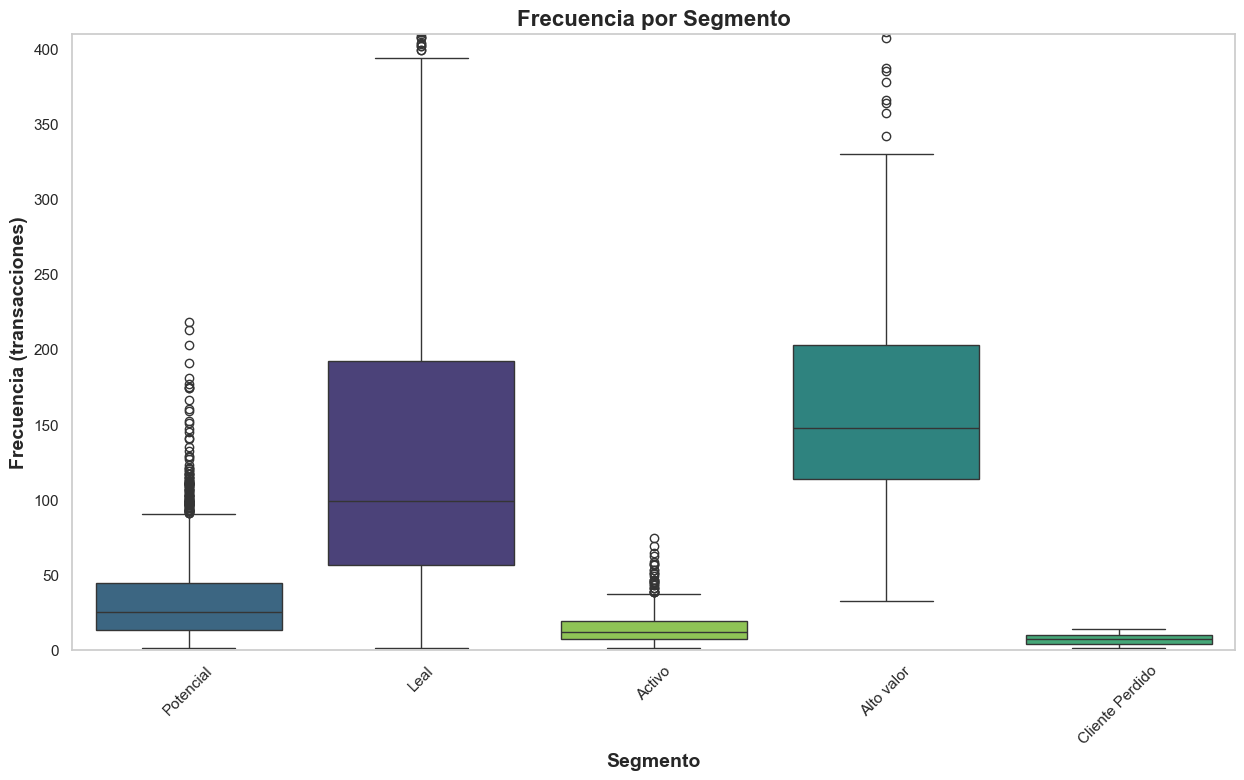

In [46]:
# Gráfico de Caja y Bigote para Frecuencia por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Frequency', palette='viridis', order=rfm_df['Segment'].value_counts().index, hue='Segment' )#showfliers=False
plt.title('Frecuencia por Segmento',  fontsize=16, fontweight='bold')
plt.xlabel('Segmento',  fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia (transacciones)',  fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 410)
plt.grid(False)
plt.show()


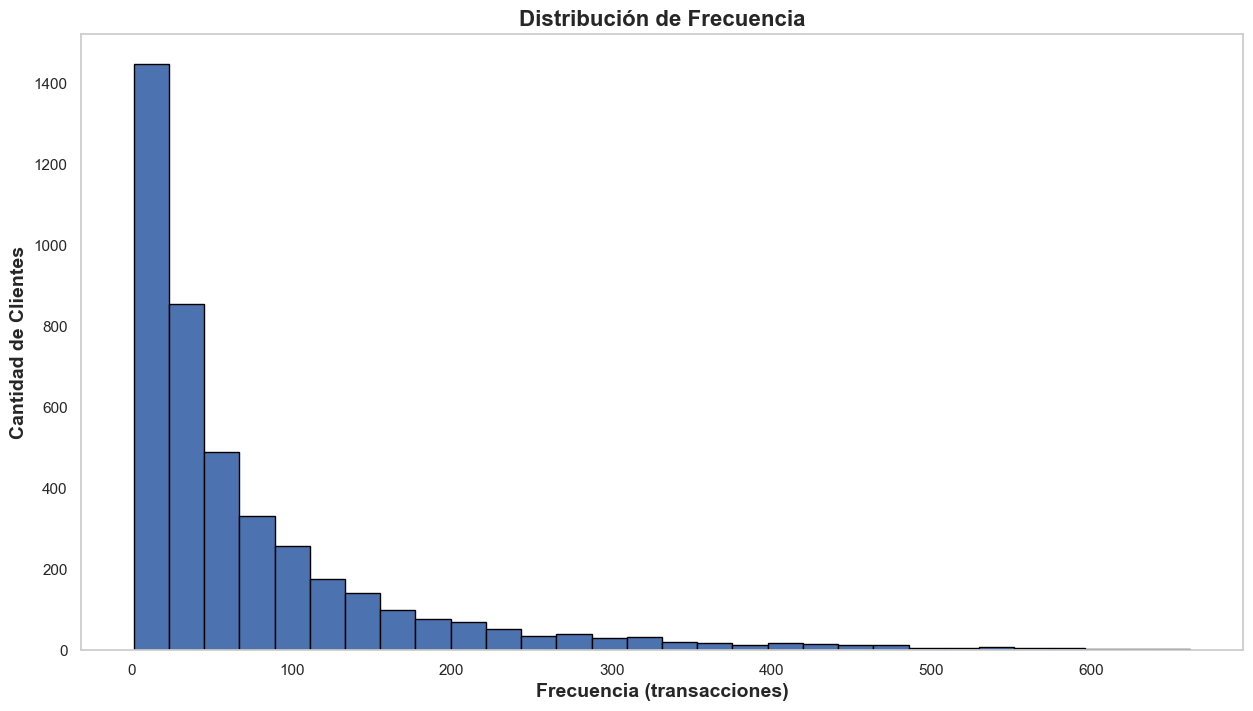

In [47]:
sns.set(style="whitegrid")
filtered_data_f = rfm_df[rfm_df['Frequency'] < rfm_df['Frequency'].quantile(0.99)]
plt.figure(figsize=(15, 8))
filtered_data_f['Frequency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Frecuencia', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia (transacciones)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')

plt.show()

Podemos observar que existe mas cantidad de cuentes que realizan entre 1 y 50 compras, mientras que resulta menos comun que los clientes realicen mas de 100 compras dentro de la tienda. La alta concentración de clientes en el rango de 1 a 50 compras sugiere que la empresa tiene una base de clientes amplia y diversa, con muchos clientes que realizan compras ocasionales o de baja frecuencia.

La presencia de clientes que realizan más de 100 compras indica que la empresa tiene un segmento de clientes leales y comprometidos que generan un alto volumen de ventas. Sin embargo, el número relativamente bajo de clientes en este segmento sugiere que existe un potencial para aumentar la fidelidad y el gasto entre los clientes existentes.

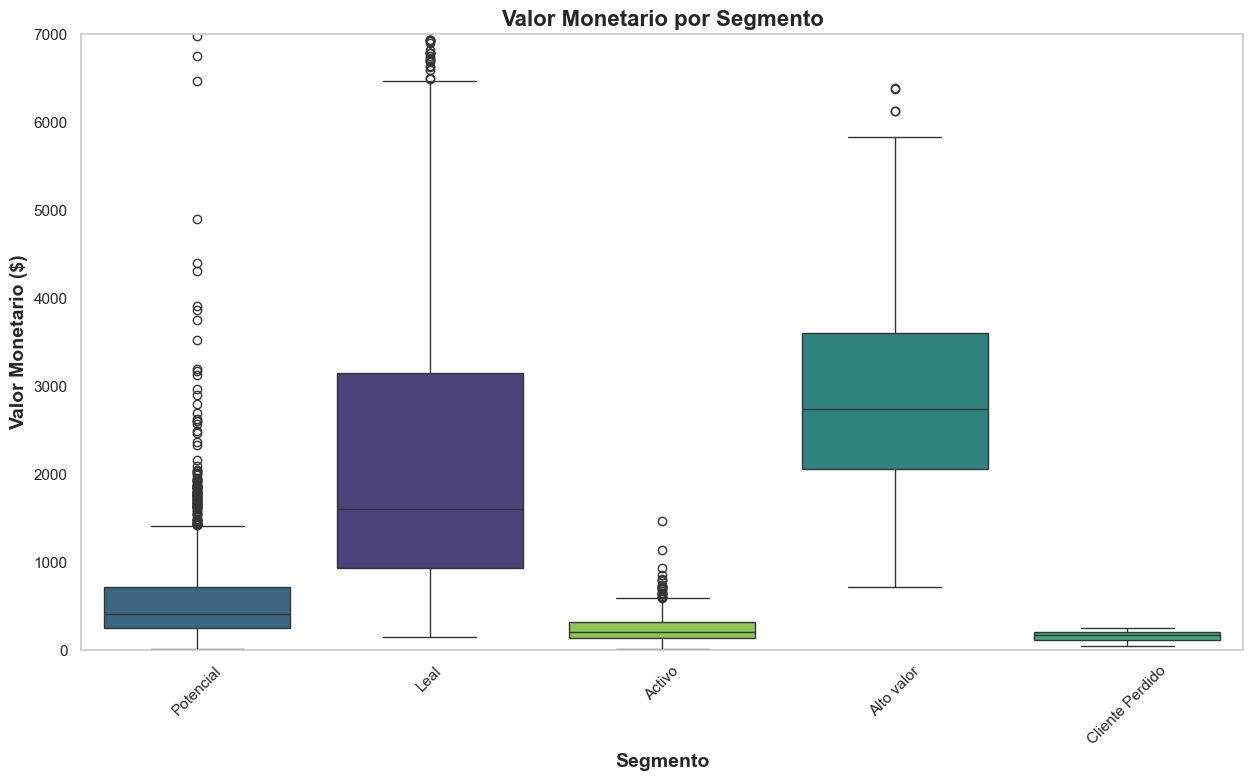

In [48]:
# Gráfico de Caja y Bigote para Valor Monetario por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Monetary', palette='viridis', order=rfm_df['Segment'].value_counts().index, hue='Segment')
plt.title('Valor Monetario por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 7000)

plt.grid(False)
plt.show()

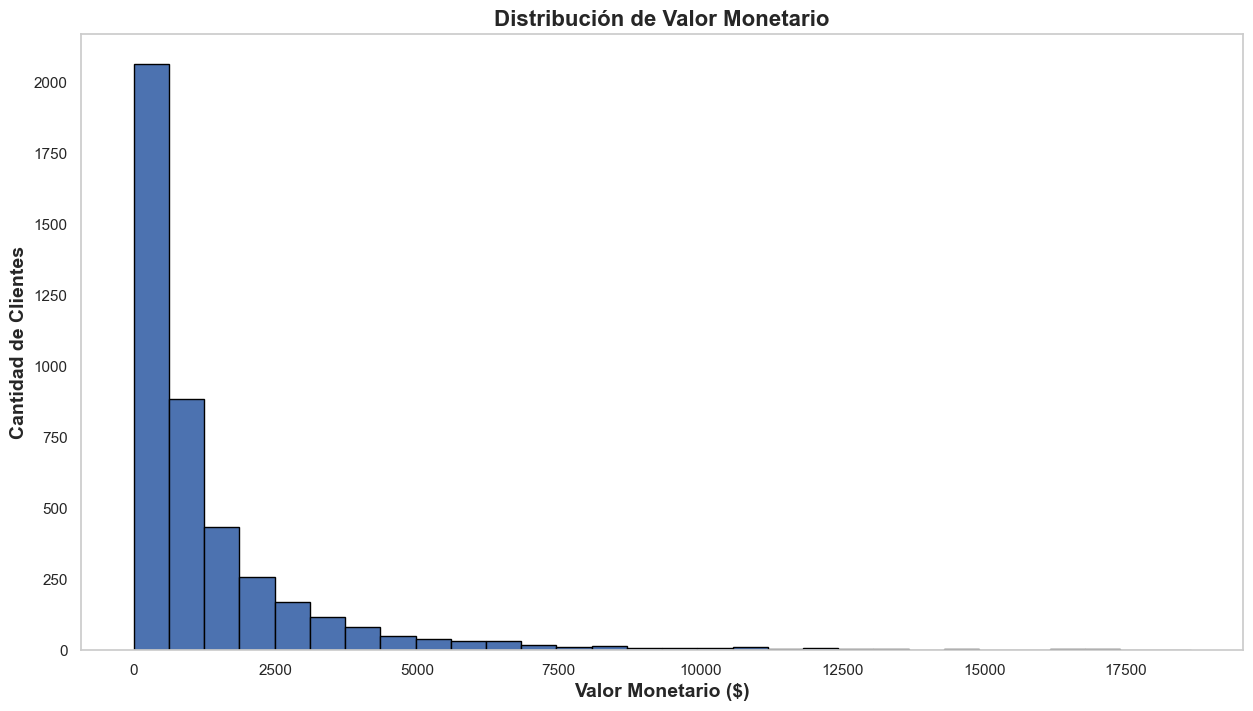

In [49]:
sns.set(style="whitegrid")
filtered_data_m = rfm_df[rfm_df['Monetary'] < rfm_df['Monetary'].quantile(0.99)]
plt.figure(figsize=(15, 8))
filtered_data_m['Monetary'].hist(bins=30, edgecolor='black', grid= False)
plt.title('Distribución de Valor Monetario', fontsize=16, fontweight='bold')
plt.xlabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


Se observa que la mayoría de los clientes se encuentran en el rango de $0 a $200, mientras que es menos común que los clientes gasten más de $1000.
La alta concentración de clientes en el rango de $0 a $200 sugiere que la empresa tiene una base de clientes amplia y diversa, con muchos clientes que realizan compras de bajo valor.

La presencia de clientes que gastan más de $1000 indica que la empresa tiene segmentos de clientes con mayor poder adquisitivo que realizan compras de alto valor. Sin embargo, el número relativamente bajo de clientes en este segmento sugiere que existe un potencial para aumentar las ventas entre estos clientes.


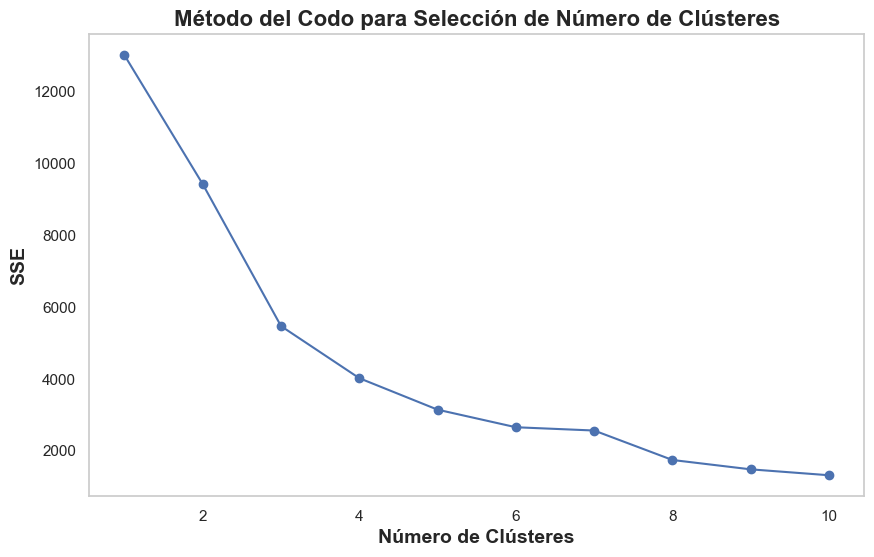

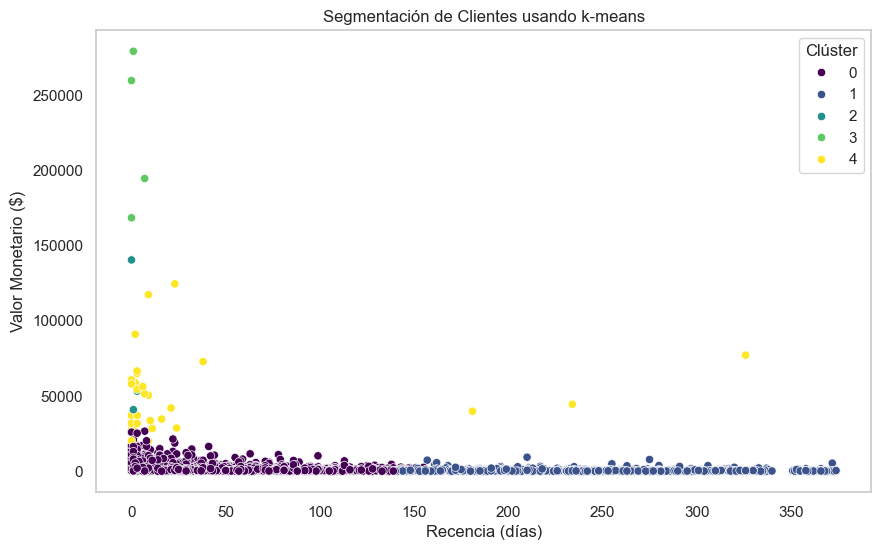

Cluster
0    3221
1    1075
4      31
2       4
3       4
Name: count, dtype: int64


Recency        Frequency          Monetary                
           mean median      mean  median      mean    median count
Cluster                                                           
0          40.7   29.0      99.0    55.0    1727.5     908.5  3221
1         247.2  242.0      27.9    18.0     486.4     308.6  1075
2           1.0    0.5    5796.5  5384.0   66748.5   47113.1     4
3           2.0    0.5     707.8   384.0  225454.7  227104.0     4
4          30.5    3.0     697.6   403.0   48766.9   42056.0    31

In [50]:
# Normalizar los datos
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Método del codo para encontrar el número óptimo de clústeres
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Selección de Número de Clústeres', fontsize=16, fontweight='bold')
plt.xlabel('Número de Clústeres', fontsize=14, fontweight='bold')
plt.ylabel('SSE', fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

# Aplicar k-means con el número óptimo de clústeres (supongamos k=4)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.grid(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Distribución de clientes por clúster
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
display(cluster_summary)


Cluster Summary Sorted by Monetary Value:
          Recency  Frequency  Monetary
Cluster                              
1          247.2       27.9     486.4
0           40.7       99.0    1727.5
4           30.5      697.6   48766.9
2            1.0     5796.5   66748.5
3            2.0      707.8  225454.7


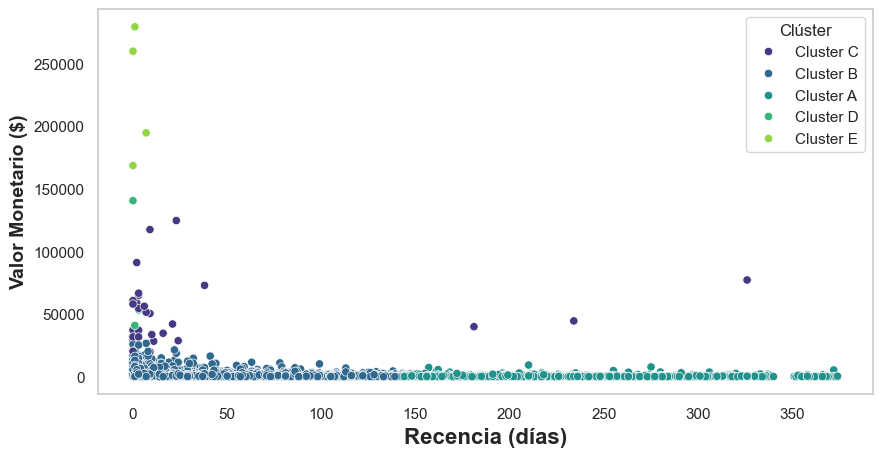

Cluster_name
Cluster B    3221
Cluster A    1075
Cluster C      31
Cluster D       4
Cluster E       4
Name: count, dtype: int64
Cluster Summary Ordered:
              Recency        Frequency          Monetary                
                mean median      mean  median      mean    median count
Cluster_name                                                           
Cluster A      247.2  242.0      27.9    18.0     486.4     308.6  1075
Cluster B       40.7   29.0      99.0    55.0    1727.5     908.5  3221
Cluster C       30.5    3.0     697.6   403.0   48766.9   42056.0    31
Cluster D        1.0    0.5    5796.5  5384.0   66748.5   47113.1     4
Cluster E        2.0    0.5     707.8   384.0  225454.7  227104.0     4


In [51]:
# Aplicar k-means con el número óptimo de clústeres k=4
kmeans = KMeans(n_clusters=5, random_state=42)

rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Calcular estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Ordenar los clústeres por valor monetario promedio
cluster_summary = cluster_summary.sort_values(by='Monetary')
print("Cluster Summary Sorted by Monetary Value:\n", cluster_summary)

# Crear un diccionario para mapear los clústeres originales a los nuevos clústeres ordenados
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(cluster_summary.index)}

# Reasignar los números de clústeres en el DataFrame original
rfm_df['Cluster'] = rfm_df['Cluster'].map(cluster_mapping)

# Diccionario de mapeo de clústeres a nombres descriptivos
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D',
    4: 'Cluster E'
}

# Crear una nueva columna con los nombres descriptivos de los clústeres
rfm_df['Cluster_name'] = rfm_df['Cluster'].map(cluster_names)

# Visualizar los clústeres ordenados
plt.figure(figsize=(10, 5))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster_name', palette='viridis')
plt.xlabel('Recencia (días)', fontsize=16, fontweight='bold')
plt.ylabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.legend(title='Clúster')
plt.grid(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Distribución de clientes por clúster ordenado
print(rfm_df['Cluster_name'].value_counts())

# Estadísticas descriptivas por clúster ordenado
cluster_summary_ordered = rfm_df.groupby('Cluster_name').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print("Cluster Summary Ordered:\n", cluster_summary_ordered)

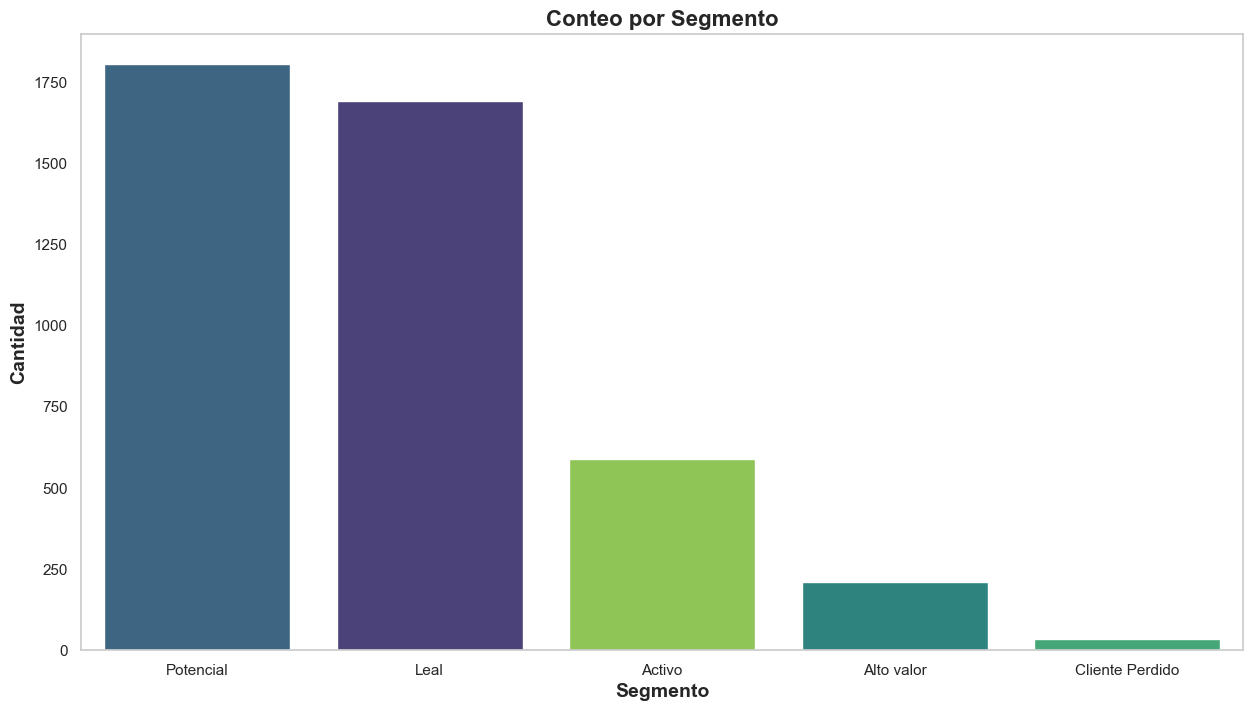

In [52]:
# Gráfico de Barras de la Distribución de Segmentos

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, hue='Segment', palette='viridis', legend=False)


plt.title('Conteo por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

plt.grid(False)
plt.show()

Se realizo una segmentacion de cliente con base en la frecuencia con la que compran en la tienda, el monto que suelen gastar en sus compras y el tiempo transcurrido desde su ultima combra. Se obtuvieron 5 segmentos que dividen a los clientes en:
- *Potencial*: Son clientes con actividad superior a la media, en los cuales podemos enformar algun programa especifico para incentivarlos a convertirlos en clientes leales o de alto valor.
- *Leal*: En este grupo encontraremos a los clientes aliosos para la empresa, ya que son propensos a realizar compras repetidas y recomendar nuestros productos o servicios a otros.
- *Activo*: Clientes que utilizan compran nuestros productos de manera regular, sin llegar a superar el promedio de compras o visitas. Este segmento representa la mayor oportunidad de crecimiento para la empresa. Se deben implementar estrategias para aumentar la satisfacción y la lealtad de estos clientes.
- *Alto valor*: Estos clientes generan la mayor parte de los ingresos para la empresa. Es importante enfocarse en este segmento para mantener su satisfacción y lealtad.
- *Cliente Churn*: Estos clientes ya no compran nuestros productos. Es de vital importancia enfocarse en este segmento y analizar las razones por las que estos clientes se han perdido y tomar medidas para evitar que otros clientes se pierdan en el futuro.

In [53]:
rfm_df.sample(10)

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment,Cluster,Cluster_name
1758,14740,196,1448.21,89,5,4,4,13,Alto valor,0,Cluster A
3106,16589,70,459.24,33,3,3,2,8,Potencial,1,Cluster B
1316,14133,129,605.64,28,4,2,3,9,Potencial,1,Cluster B
2108,15222,319,585.00,5,5,1,3,9,Potencial,0,Cluster A
4169,18065,5,2392.83,137,1,5,5,11,Leal,1,Cluster B
2099,15212,240,101.80,5,5,1,1,7,Potencial,0,Cluster A
529,13040,8,676.99,43,1,3,3,7,Potencial,1,Cluster B
1189,13956,4,1026.42,152,1,5,4,10,Leal,1,Cluster B
2952,16370,81,1320.56,228,4,5,4,13,Alto valor,1,Cluster B
1622,14549,311,289.24,56,5,3,2,10,Leal,0,Cluster A


In [54]:
def churn(row):
    if row == 'Cliente Perdido':
        return 1 # cliente perdido o que probablemente abandone pronto
    else:
        return 0 #menos probabilidad de abandono 



rfm_df['Churn'] = rfm_df['Segment'].apply(churn)

Recomendaciones:

Con base en el analisis y la segmentacion de los datos realizados:

- **Implementar programas de fidelización para clientes**: Los programas de fidelización pueden ayudar a mantener a los clientes comprometidos y reducir la rotación. Estos programas pueden ofrecer beneficios como descuentos, puntos, acceso anticipado a nuevos productos o servicios, y eventos exclusivos.

- **Mejorar el servicio al cliente**: Un buen servicio al cliente puede ayudar a aumentar la satisfacción del cliente y reducir la probabilidad de que se vayan. La empresa debe asegurarse de que sus canales de servicio al cliente sean accesibles y fáciles de usar, y que sus empleados estén capacitados para brindar un servicio de alta calidad.

- **Analizar las razones por las que los clientes se van**: Es importante comprender por qué los clientes se van para poder abordar las causas subyacentes. La empresa puede realizar encuestas de salida o entrevistas a los clientes perdidos para obtener información sobre sus razones para irse.

- **Analizar los factores que impulsan la fidelización**: La empresa debería investigar los factores que impulsan la fidelización de los clientes que realizan más de 100 compras. Esto podría ayudar a identificar estrategias para aumentar la fidelidad entre otros segmentos de clientes.

- **Personalizar las comunicaciones de marketing**: La empresa podría personalizar sus comunicaciones de marketing en función del historial de compras de cada cliente. Esto podría ayudar a aumentar la relevancia de los mensajes de marketing y fomentar la conversión.

- **Analizar los factores que influyen en el gasto**: La empresa debería investigar los factores que influyen en el gasto de los clientes en diferentes rangos de precios. Esto podría incluir factores demográficos, psicográficos, comportamentales y relacionados con los productos y servicios de la empresa.

- **Implementar estrategias para aumentar el gasto promedio**: La empresa podría implementar estrategias para aumentar el gasto promedio de los clientes en el rango de $0 a $200. Esto podría incluir ofrecer descuentos por volumen, promociones especiales, programas de fidelización o mejorar la experiencia de compra en la tienda.

- **Atraer y fidelizar a los clientes de alto valor**: La empresa podría implementar estrategias de marketing personalizadas para atraer y fidelizar a los clientes que gastan más de $1000. Esto podría incluir ofrecer productos y servicios exclusivos, brindar un servicio al cliente excepcional o invitar a eventos especiales.